**Import the required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)         # To get different colors
pd.set_option('display.max_columns',None) # to display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [2]:
#My data file and python files is in same location
#so no need to full path
df = pd.read_csv("C:\\Data Science\\Data Science Nareshit\\EDA_Datasets\\telecom_customer_churn.csv")
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [3]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.tail()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,63,NaN,No,NaN,NaN,Yes,Cable,5.0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


# Data Preprocessing Part 1

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
df.shape
#no of rows are 7043
#no of columns are 38

(7043, 38)

In [7]:
#Drop identifier column
df.drop(columns=['Customer ID','Zip Code'],inplace = True)


In [8]:
df.shape

(7043, 36)

In [9]:
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Offer'] = le.fit_transform(df['Offer'])

In [11]:
#check the no of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Gender                       2
Married                      2
City                      1106
Phone Service                2
Multiple Lines               2
Internet Service             2
Internet Type                3
Online Security              2
Online Backup                2
Device Protection Plan       2
Premium Tech Support         2
Streaming TV                 2
Streaming Movies             2
Streaming Music              2
Unlimited Data               2
Contract                     3
Paperless Billing            2
Payment Method               3
Customer Status              3
Churn Category               5
Churn Reason                20
dtype: int64

In [12]:
df.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int32
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming 

In [13]:
#Drop city column because it have a lot of unique value
df.drop(columns=['City'],inplace=True)
df.shape

(7043, 35)

# Exploratory Data Analysis

In [14]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
len(cat_vars)

20

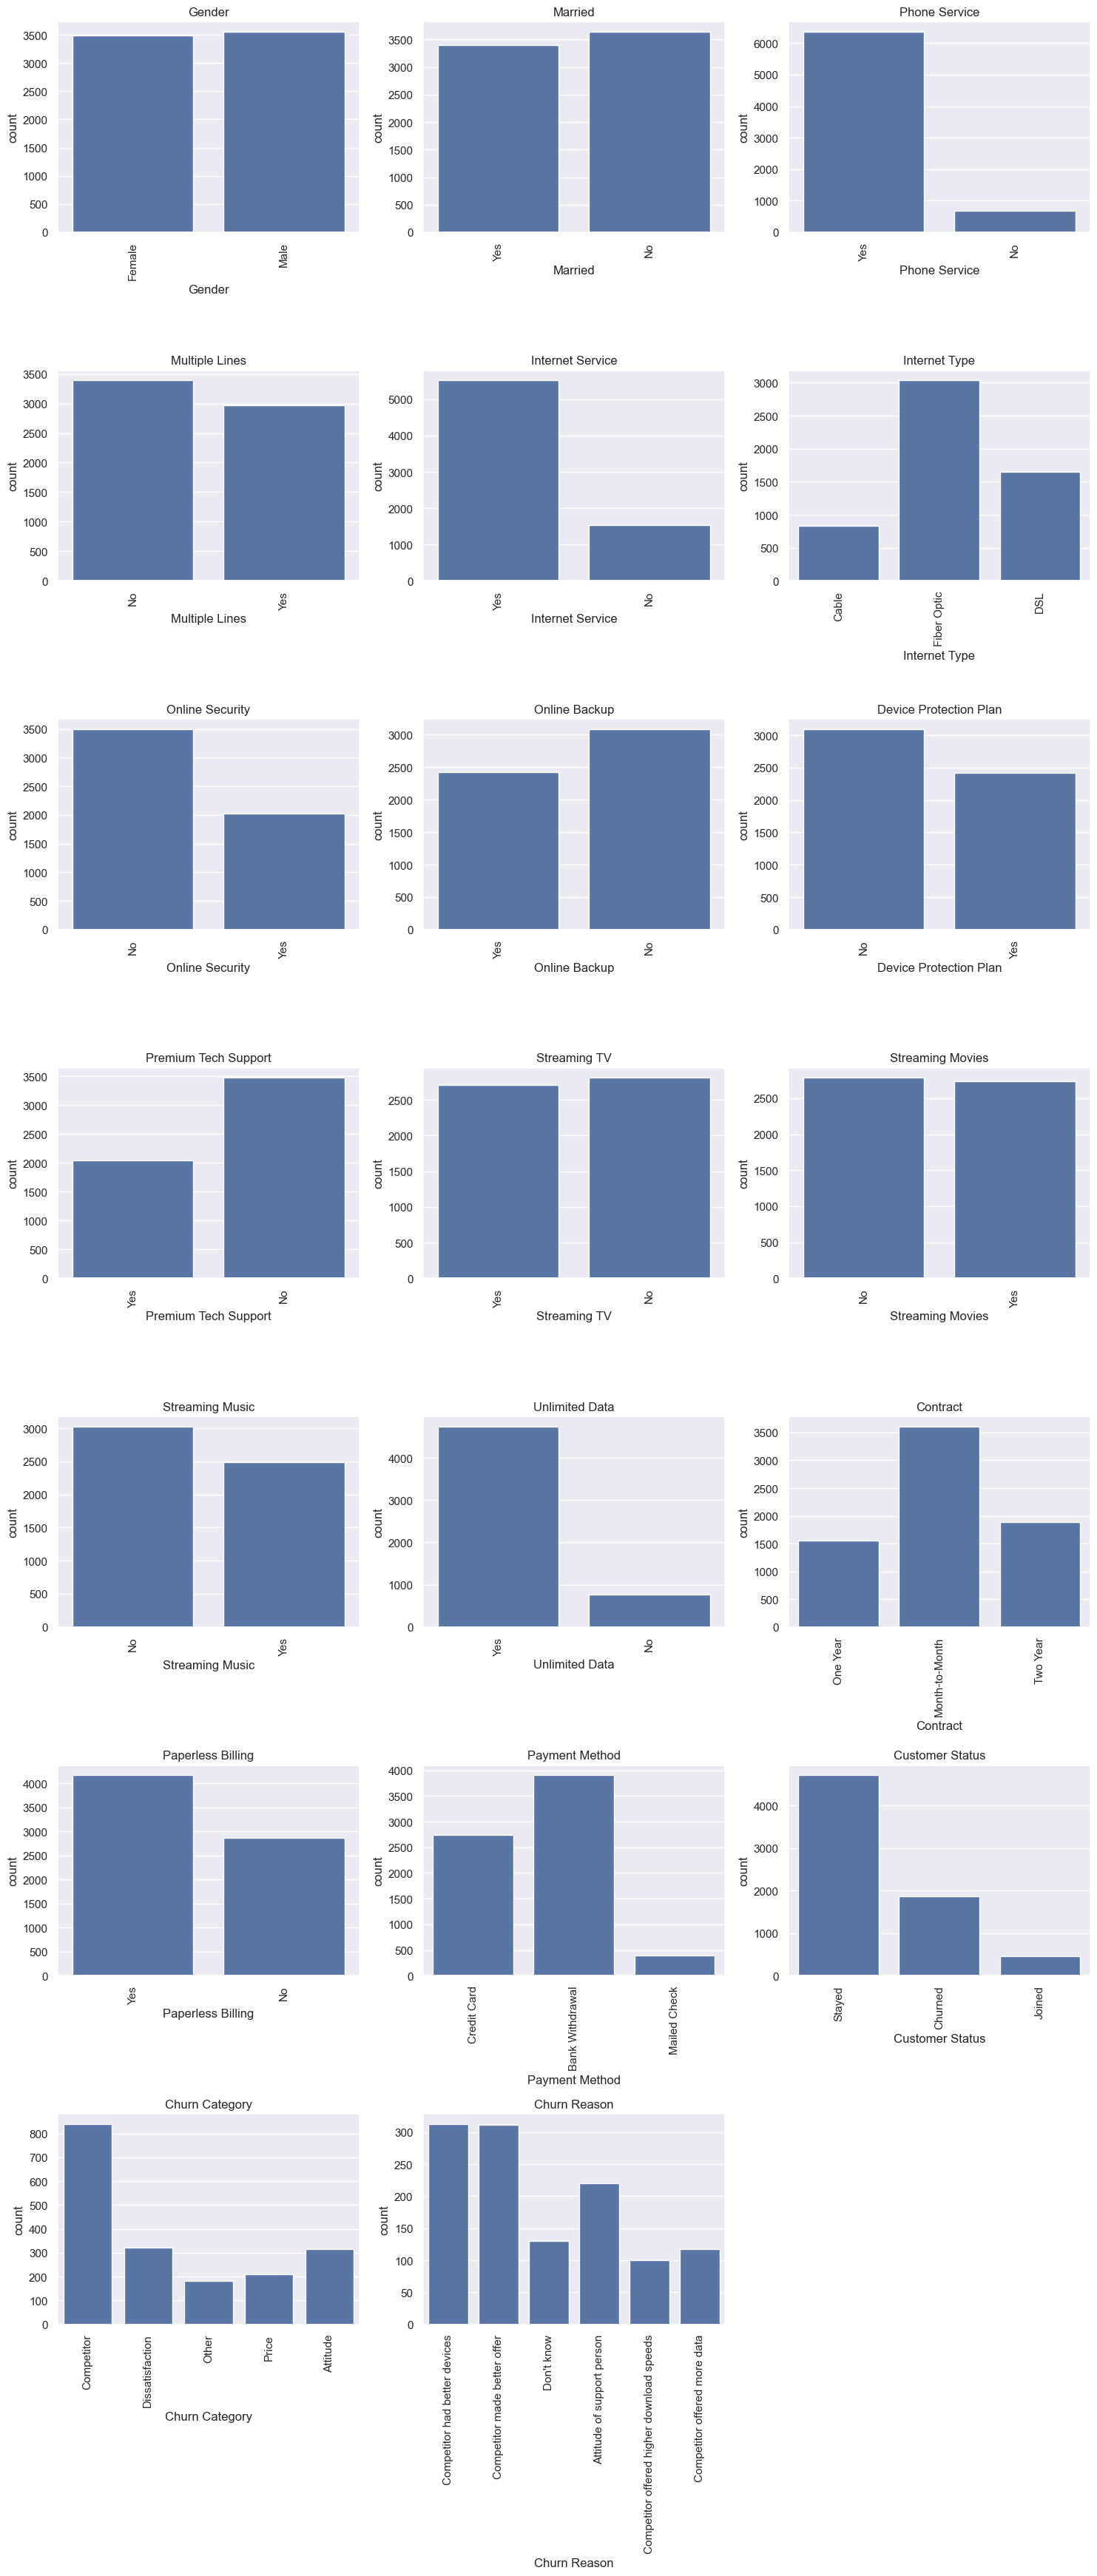

In [15]:
#Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

#create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_df,ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x',rotation=90)

#Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

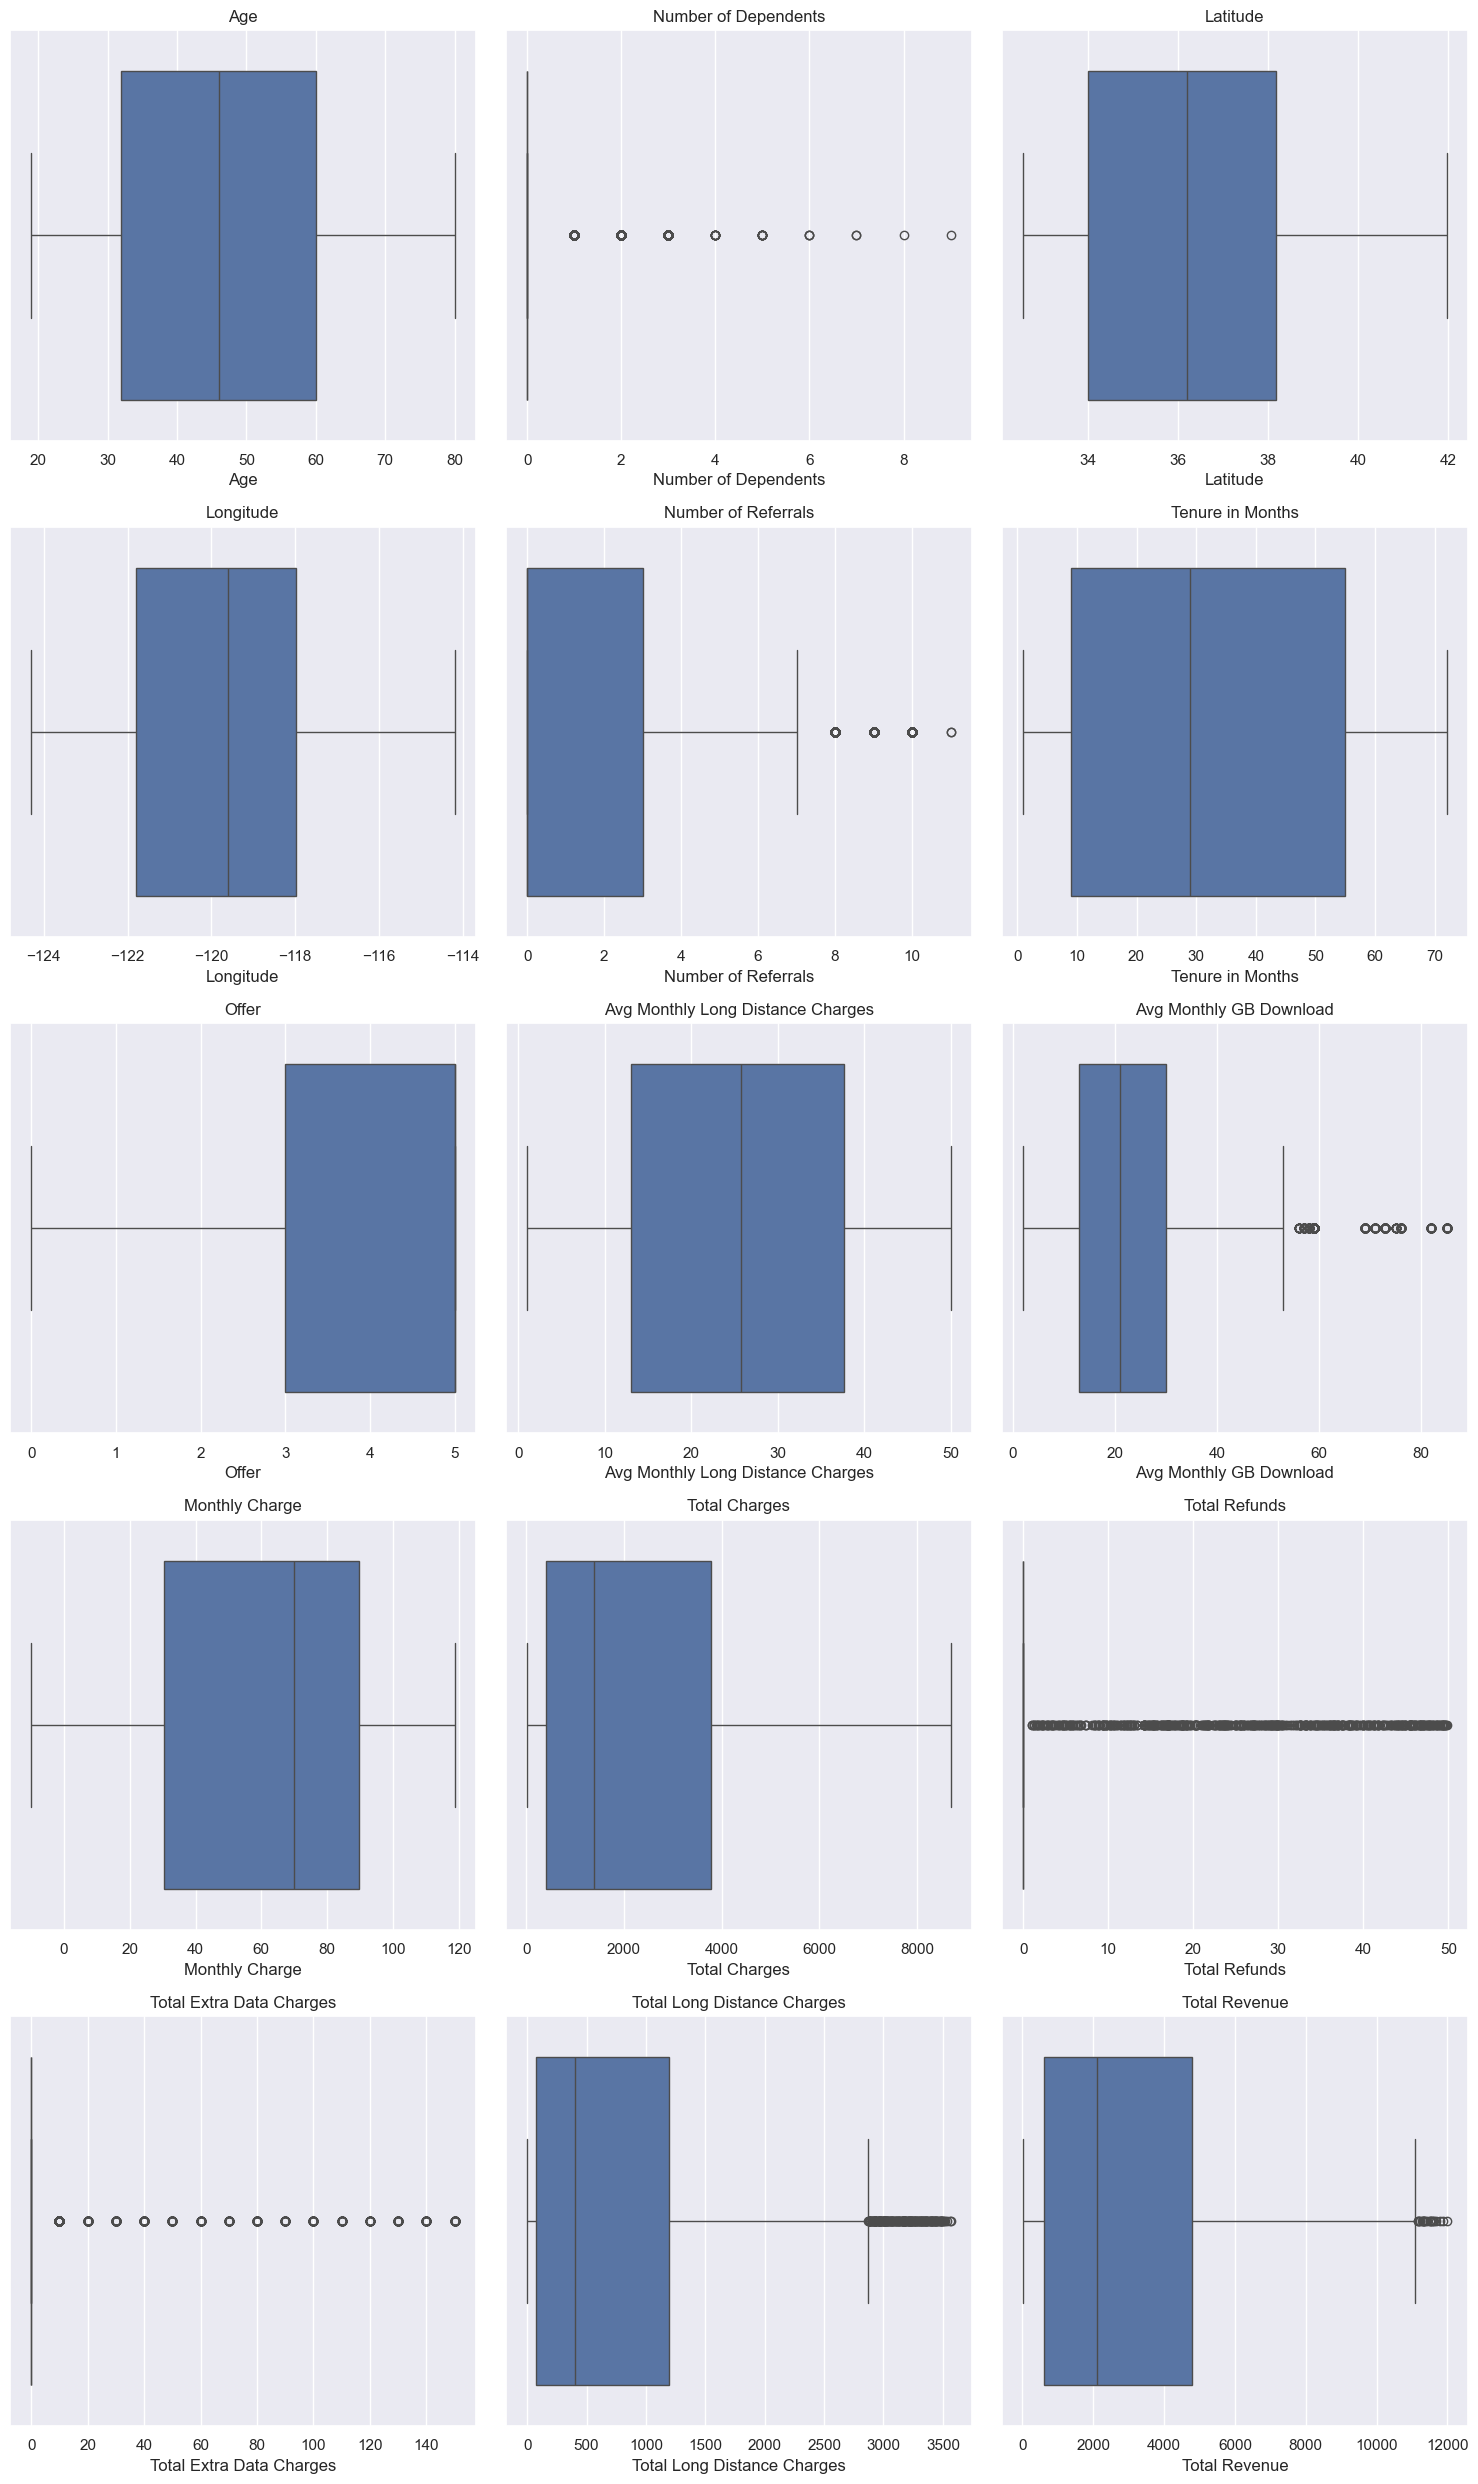

In [16]:
#Get the names of all columns with data type 'object' (categorical columns)
num_vars = df.select_dtypes(include=['int','float']).columns.tolist()

#create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(num_vars):
    sns.boxplot(x=df[var],ax=axs[i])
    axs[i].set_title(var)

#Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

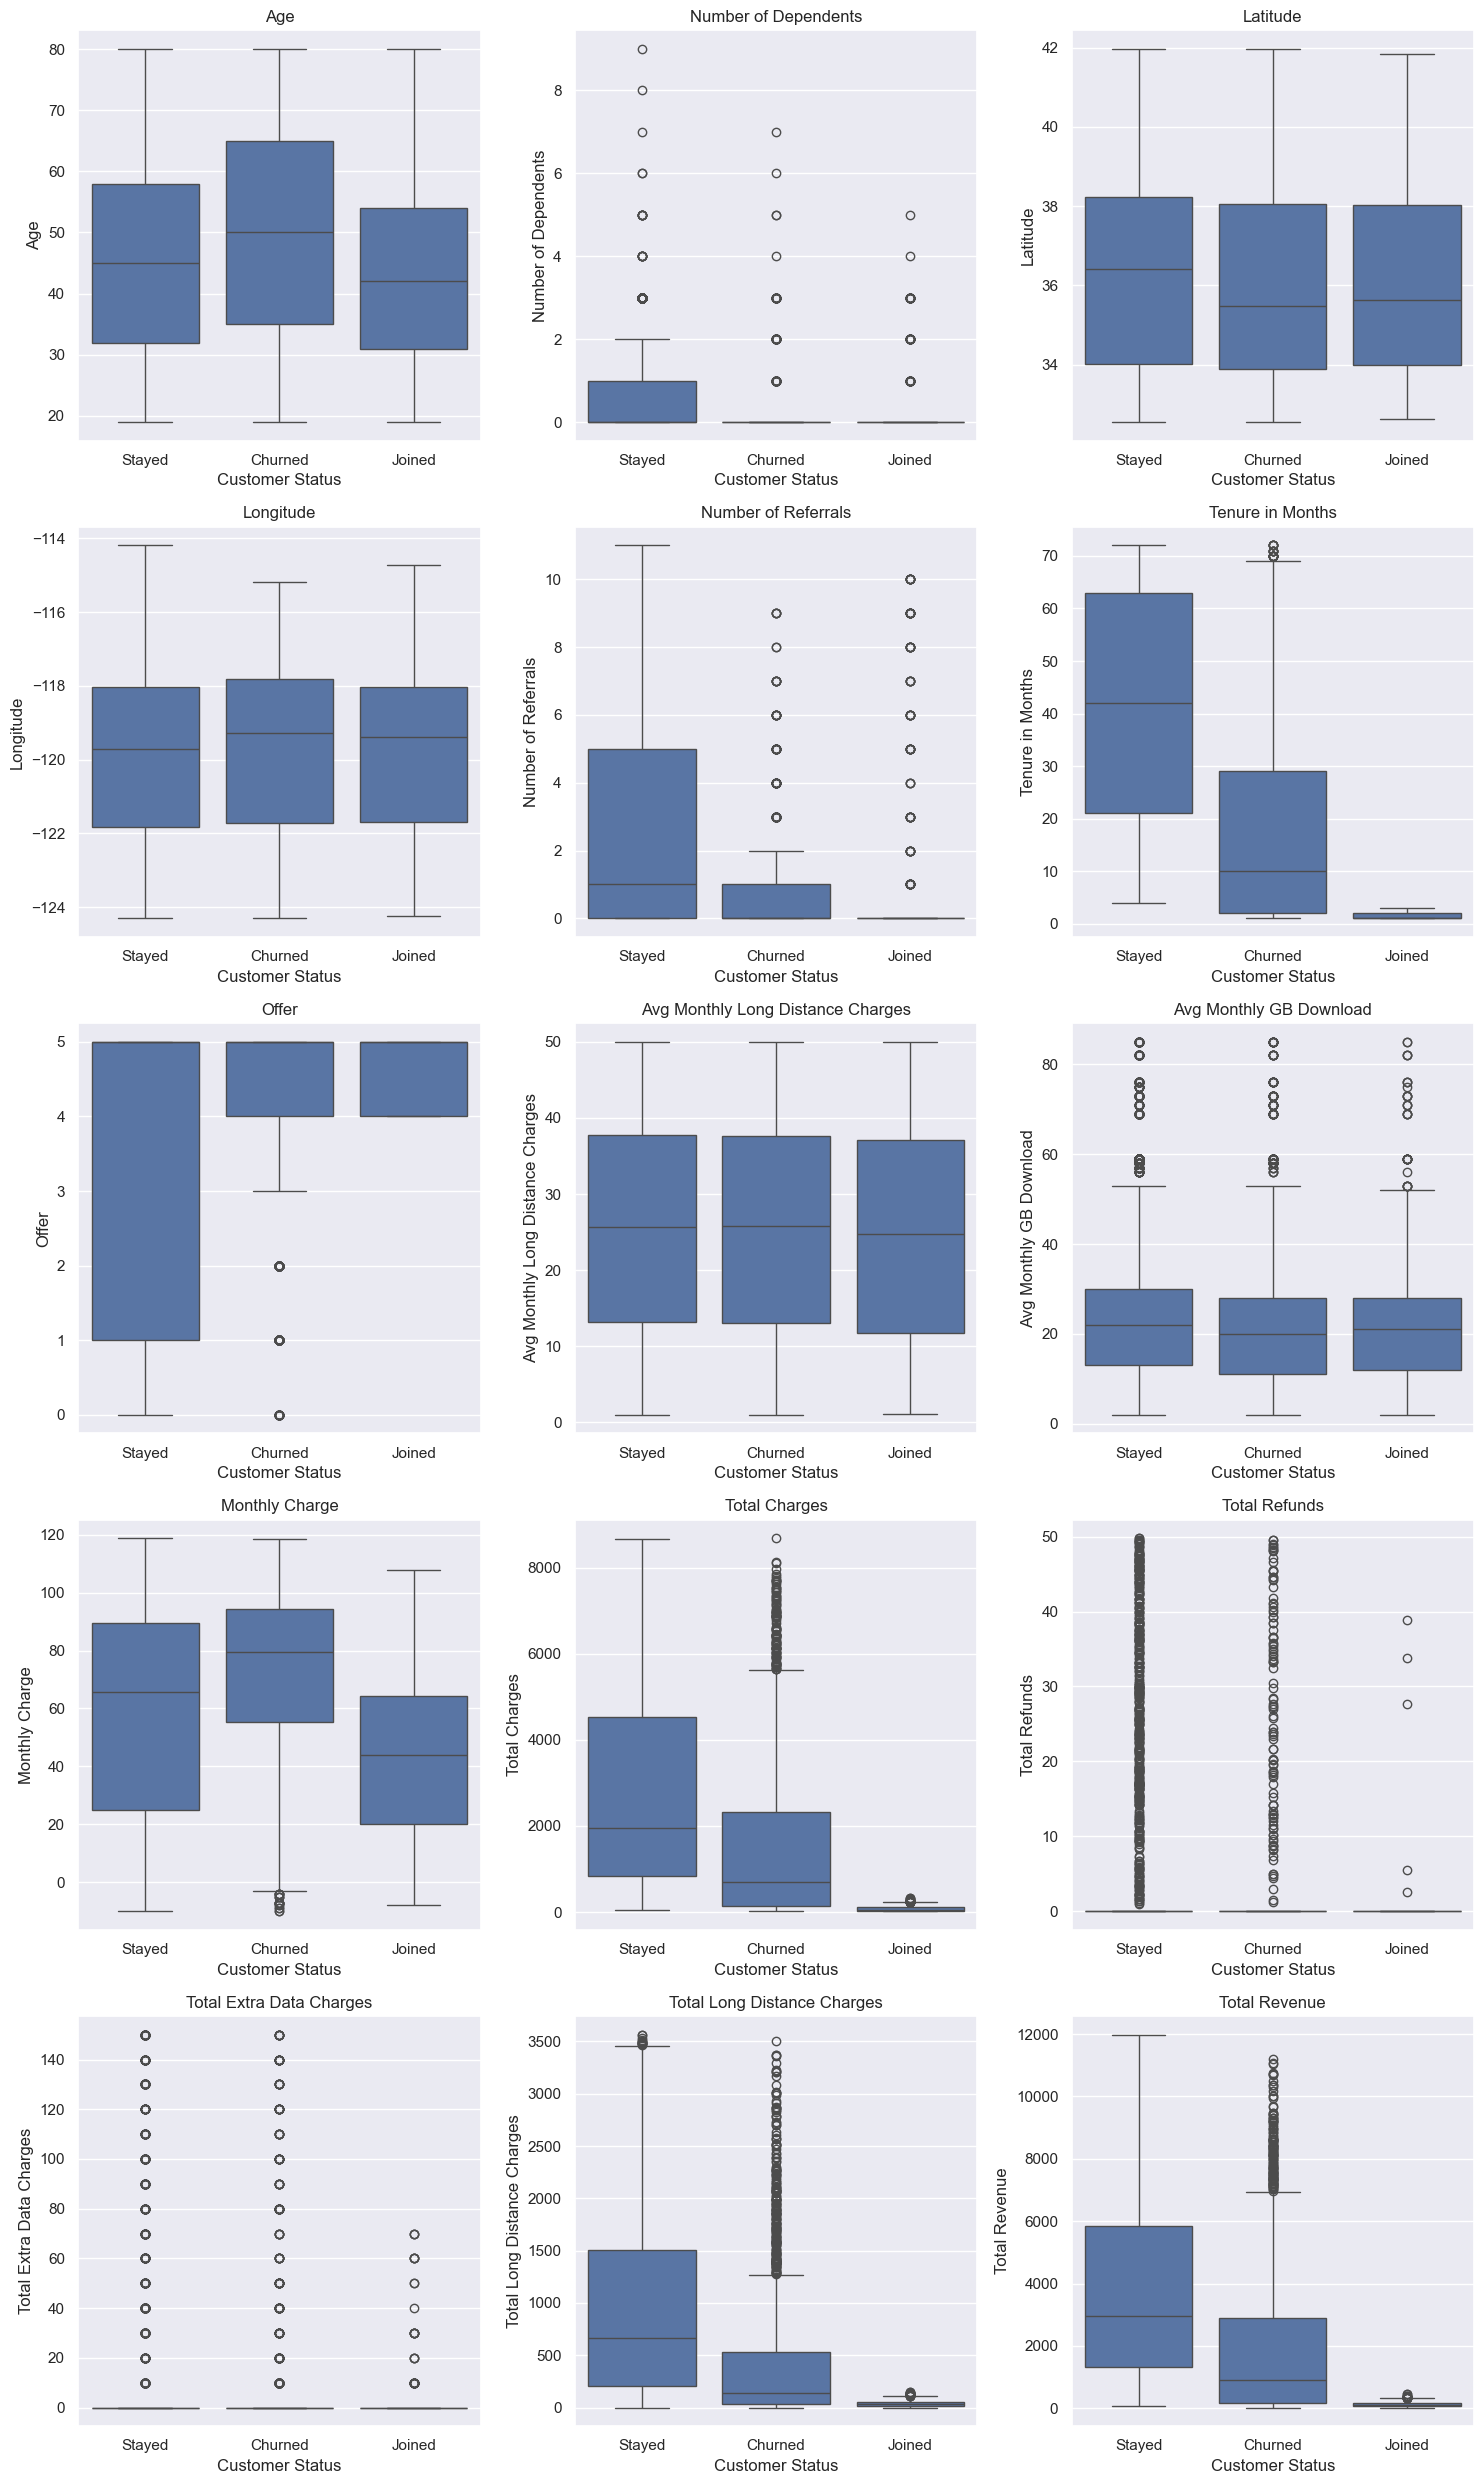

In [17]:
#Get the names of all columns with data type 'object' (categorical columns)
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

#create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(int_vars):
    sns.boxplot(y=var,x='Customer Status',data=df,ax=axs[i])
    axs[i].set_title(var)

#Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

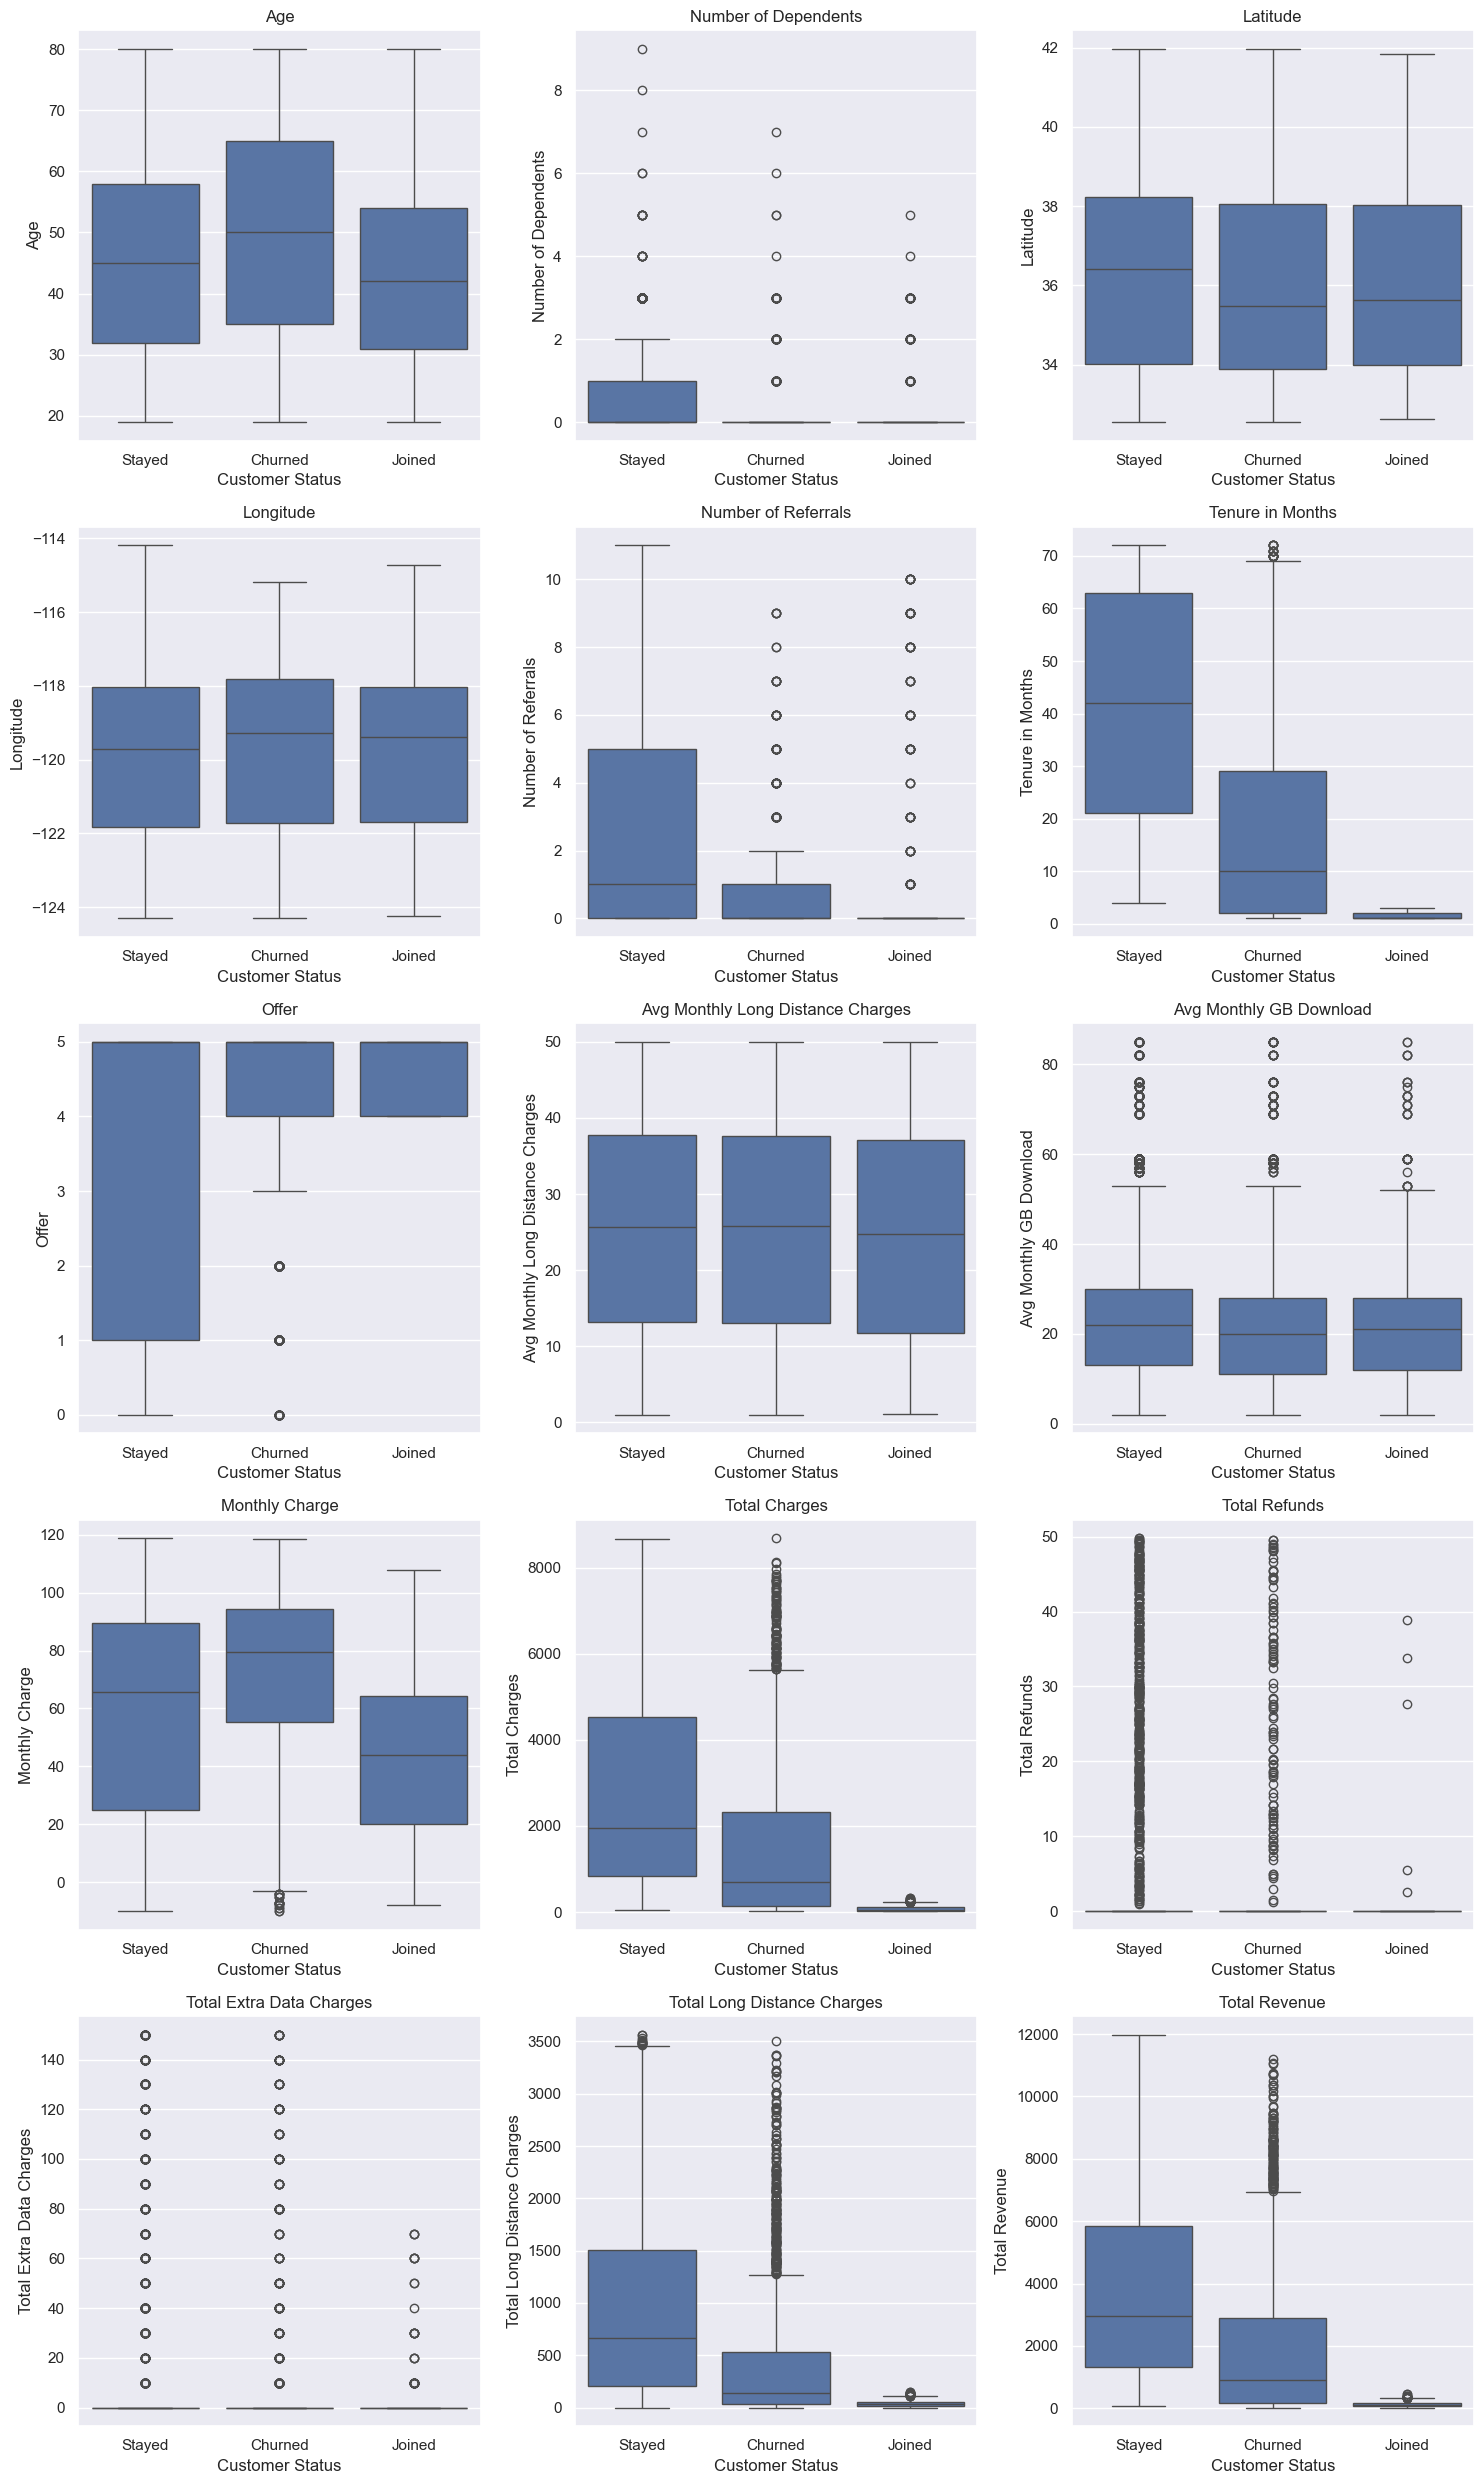

In [18]:
#Get the names of all columns with data type 'object' (categorical columns)
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

#create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(int_vars):
    sns.boxplot(y=var,x='Customer Status',data=df,ax=axs[i])
    axs[i].set_title(var)

#Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

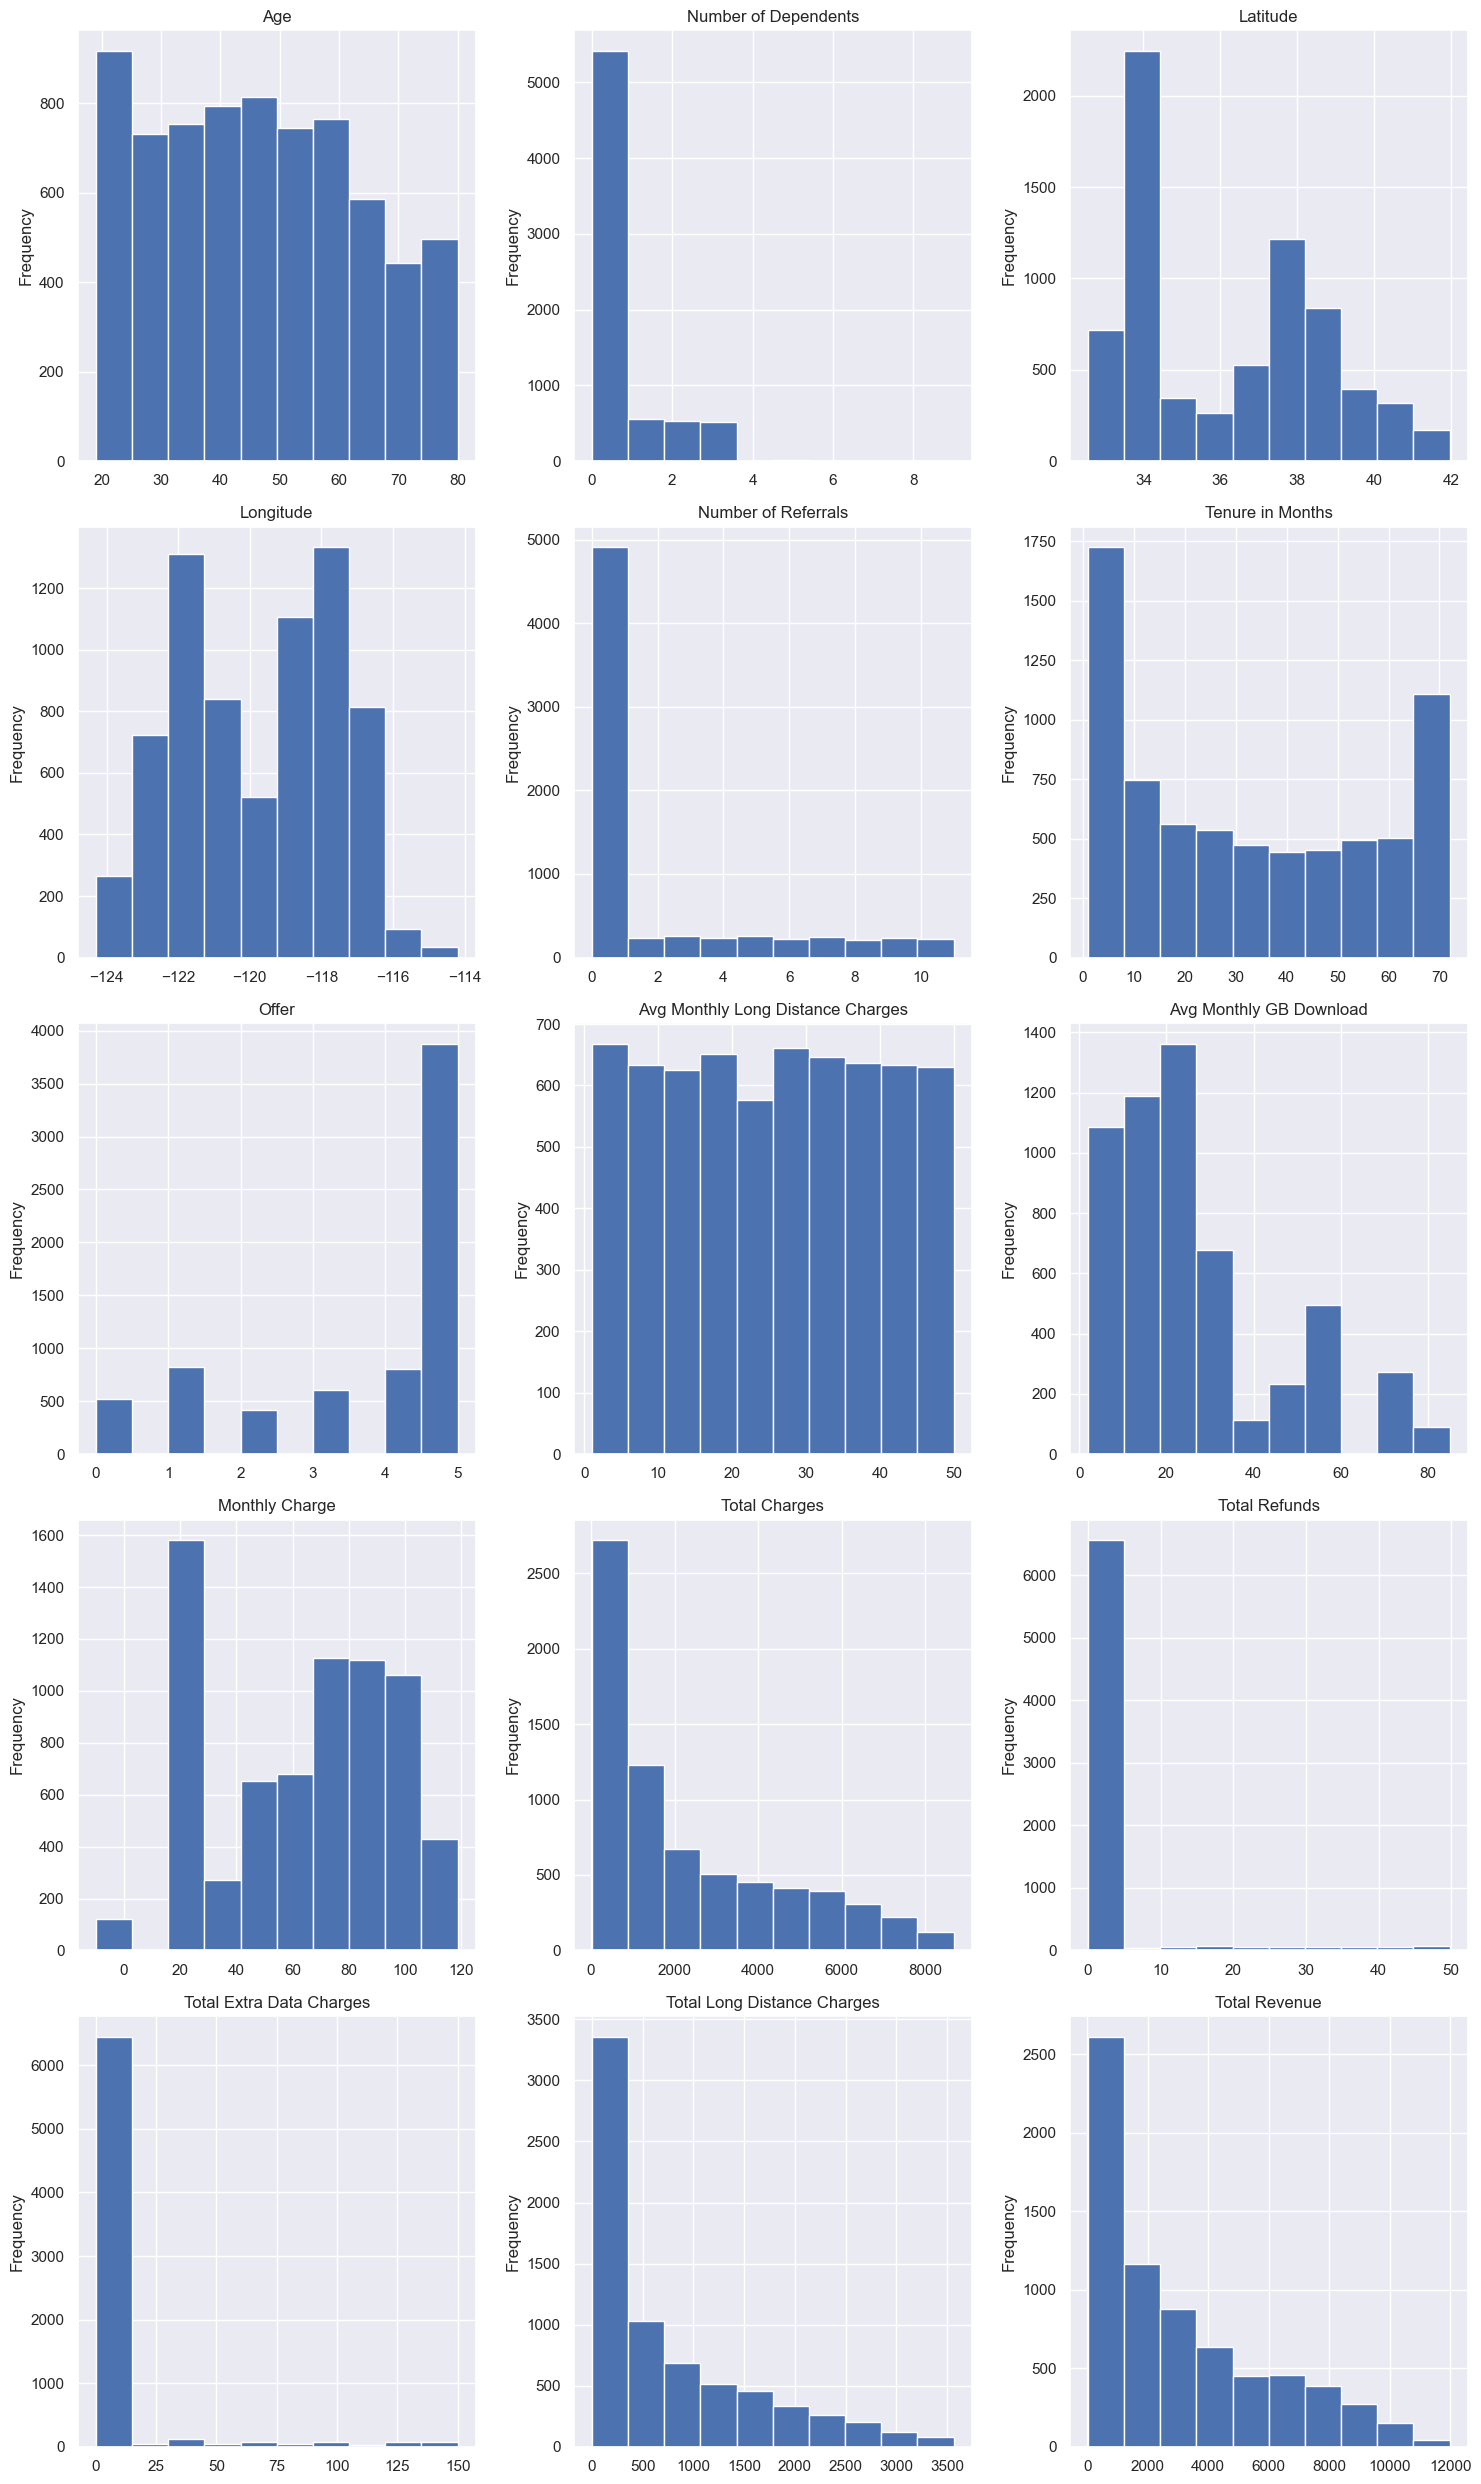

In [19]:
#Get the names of all columns with data type 'object' (categorical columns)
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

#create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

#Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

In [20]:
#Customer Status
#Stayed
#Joined
#Churned

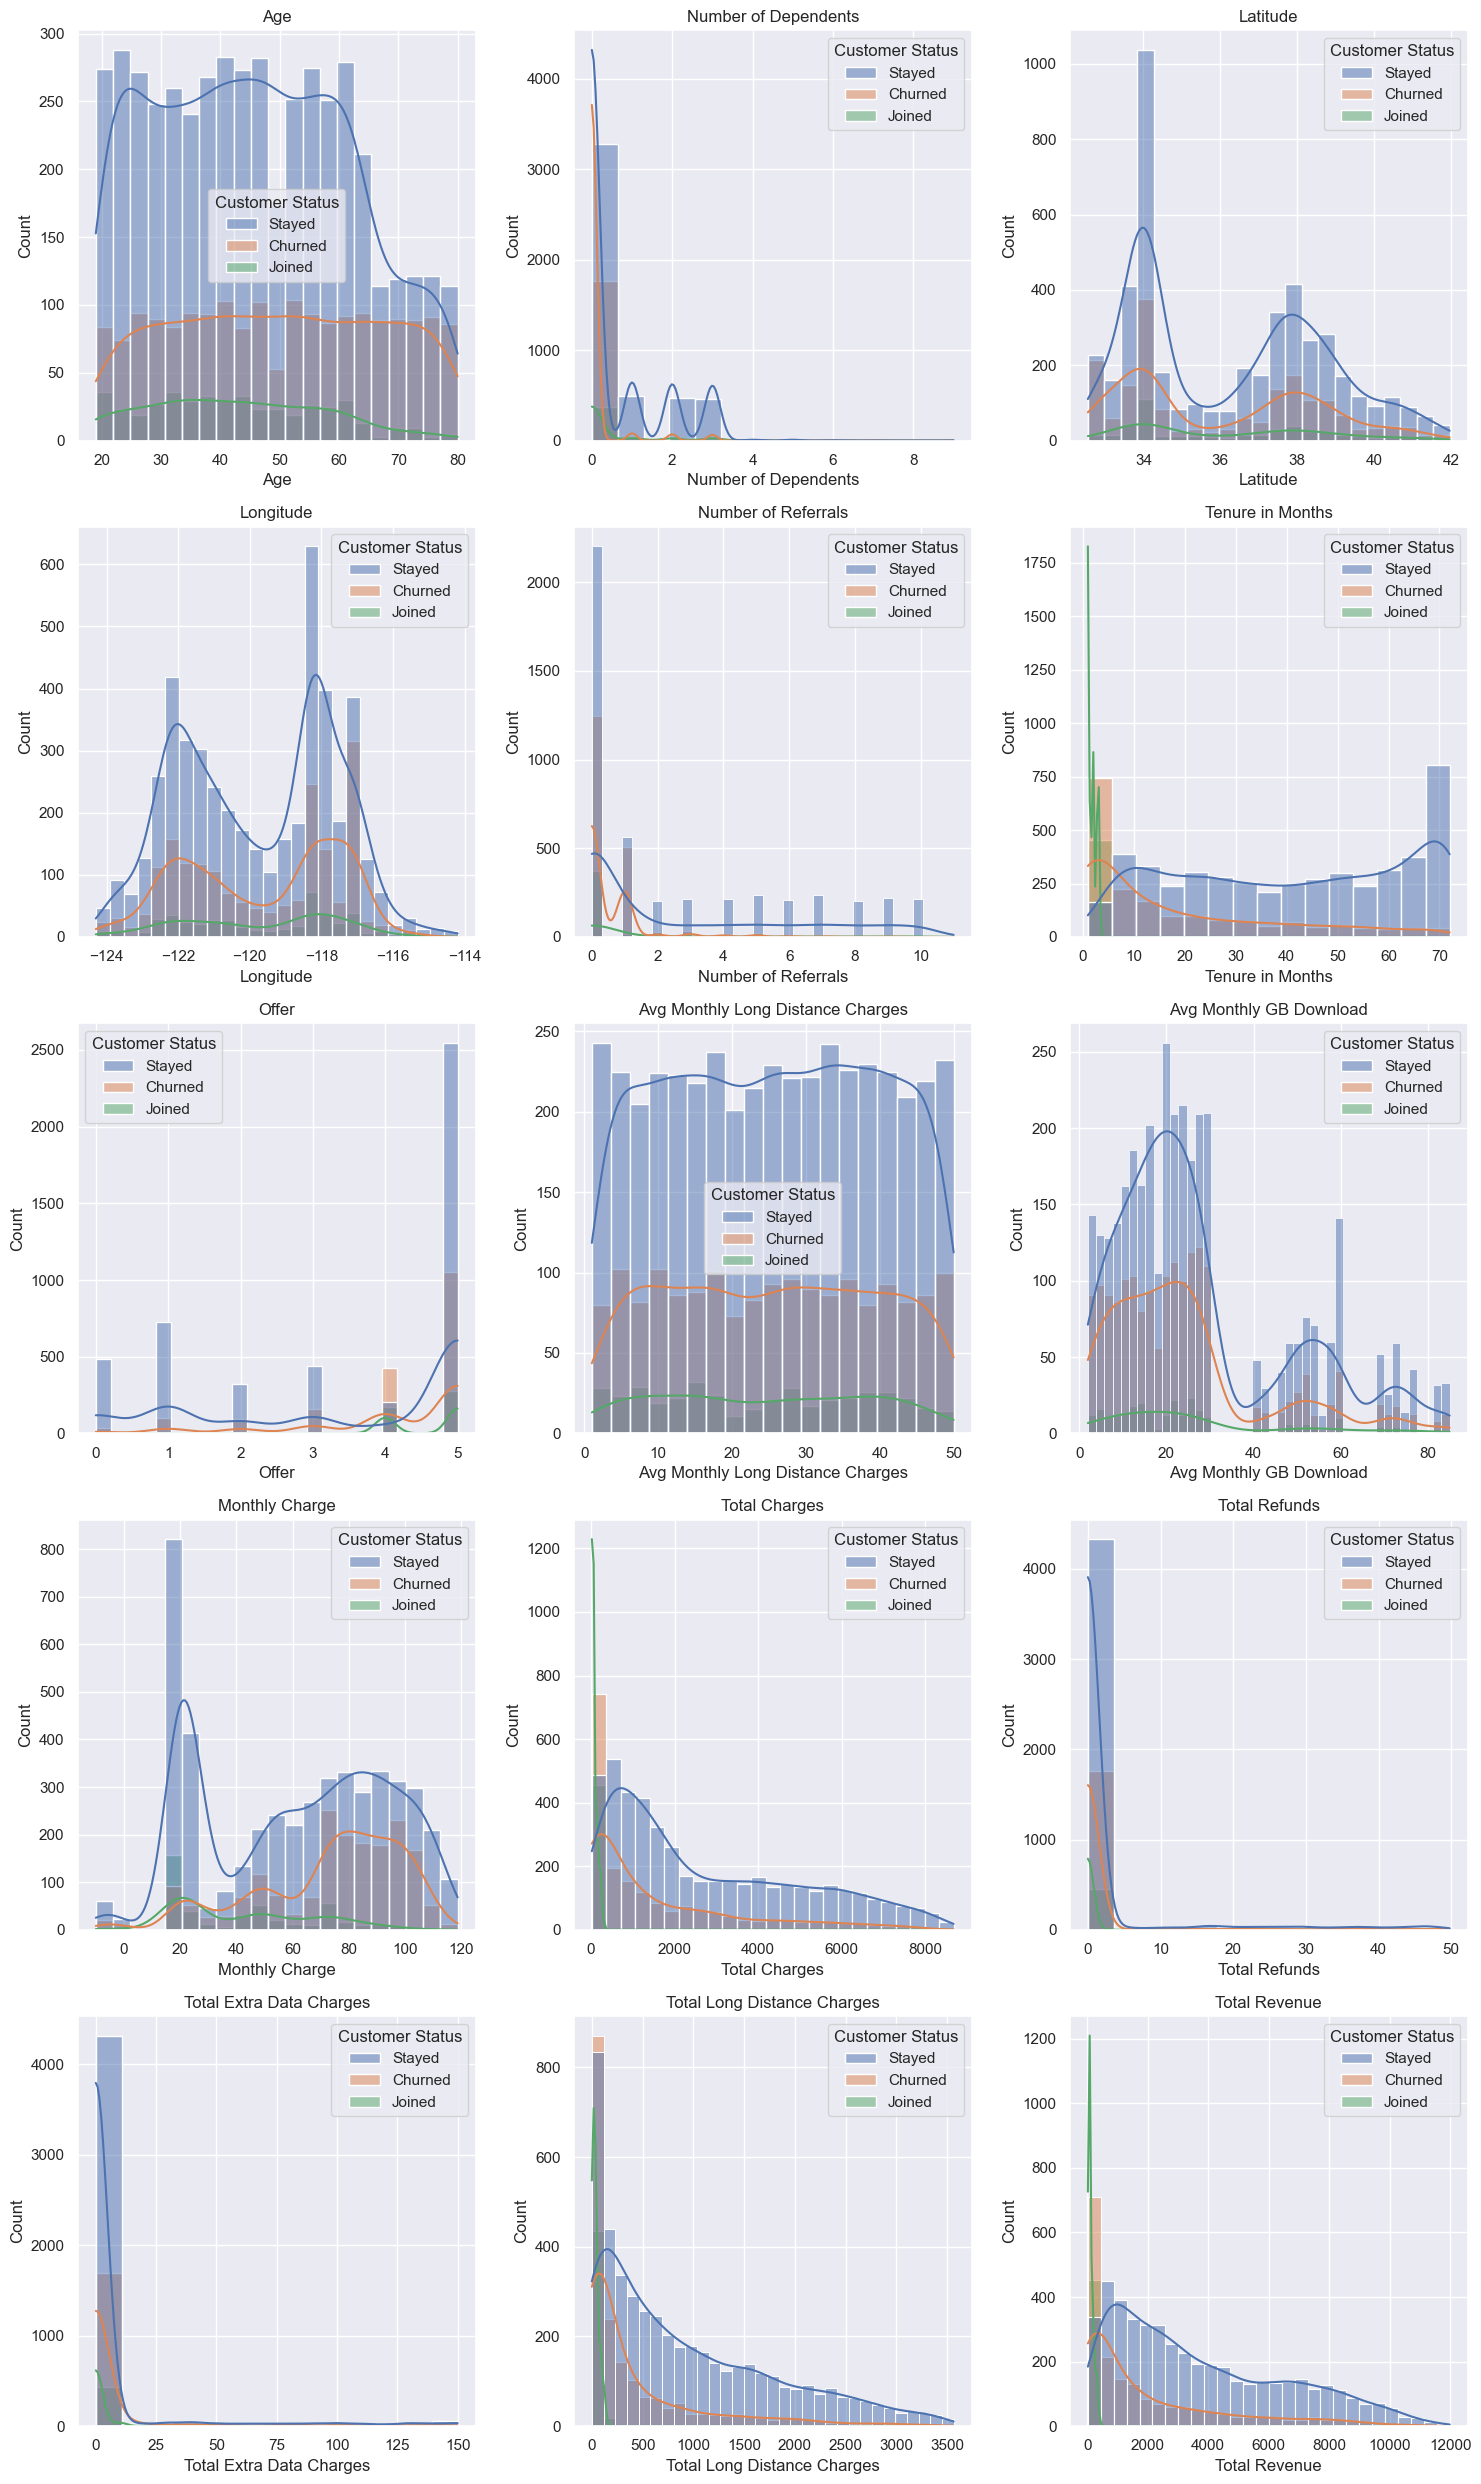

In [21]:
#Get the names of all columns with data type 'object' (categorical columns)
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

#create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(int_vars):
    sns.histplot(kde=True,x=var,hue='Customer Status',data=df,ax=axs[i])
    axs[i].set_title(var)

#Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

C:\Users\tharu\AppData\Local\Temp\ipykernel_9432\651727595.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
C:\Users\tharu\AppData\Local\Temp\ipykernel_9432\651727595.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
C:\Users\tharu\AppData\Local\Temp\ipykernel_9432\651727595.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
C:\Users\tharu\AppData\Local\Temp\ipykernel_9432\651727595.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get

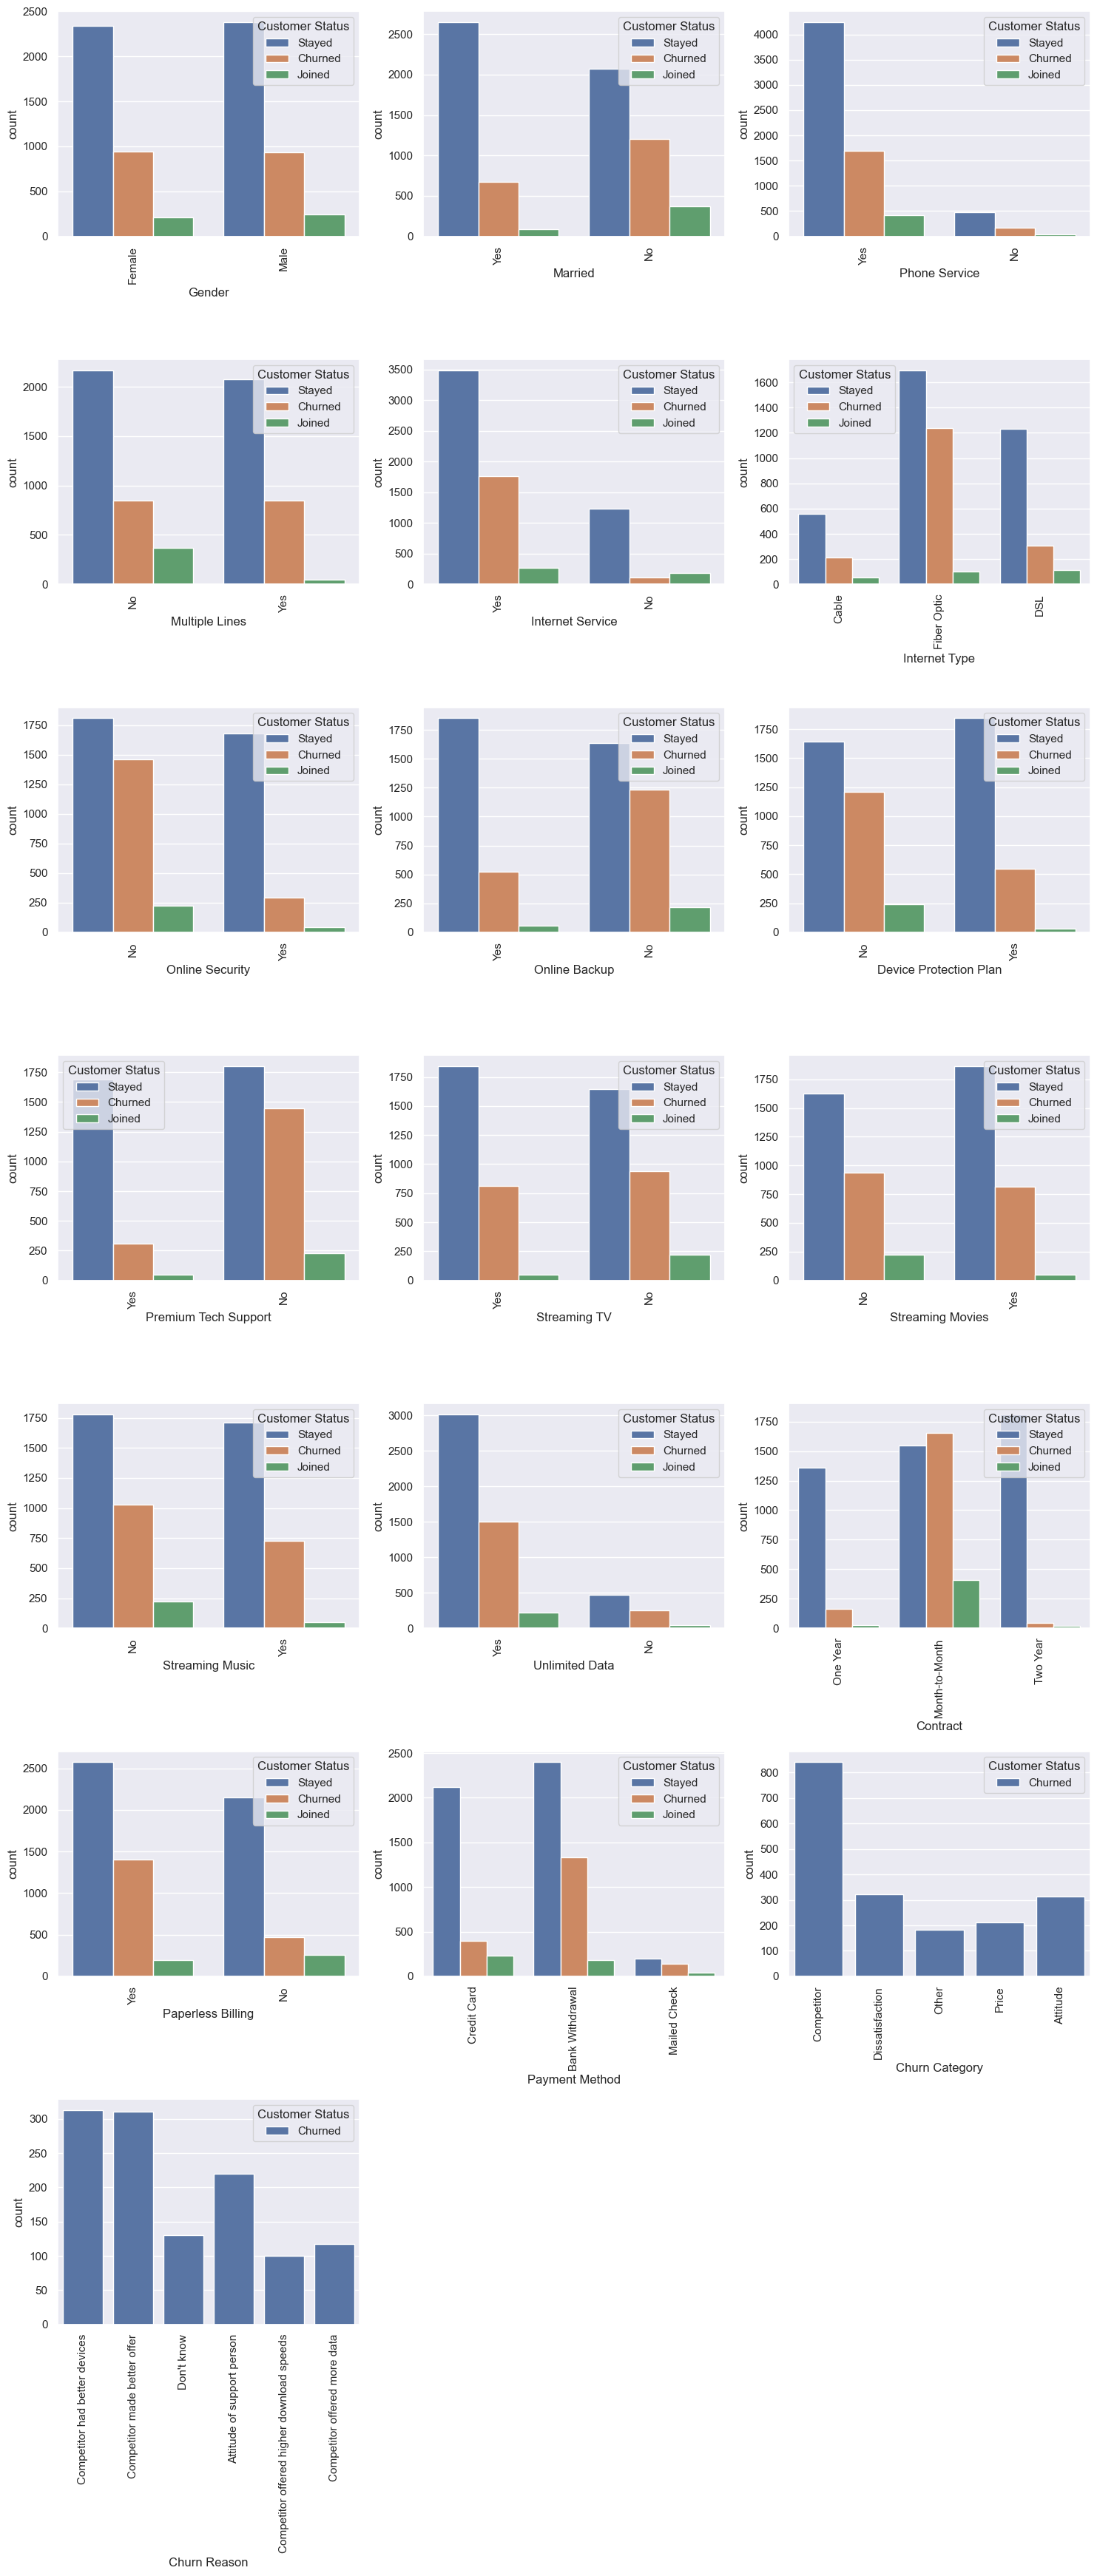

In [22]:
#Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

#Exclude 'Attrition' from the list if it exists in cat_vars
if 'Customer Status' in cat_vars:
    cat_vars.remove('Customer Status')

#create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
axs = axs.flatten()

#Create a countplot for the top 6 values of each categorical variable using Seaborn
for i,var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var,hue = 'Customer Status',data=filtered_df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

#Remove any extra empty subplots if needed
for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

In [23]:
# #Get the names of all columns with data type 'object' (categorical columns)
# cat_vars = df.select_dtypes(include='object').columns.tolist()

# #Exclude 'Attrition' from the list if it exists in cat_vars
# if 'Customer Status' in cat_vars:
#     cat_vars.remove('Customer Status')

# #create a figure with subplots
# num_cols = len(cat_vars)
# num_rows = (num_cols+2)//3
# fig,axs = plt.subplots(nrows = num_rows,ncols=3,figsize=(15,5*num_rows))
# ax = axs.flatten()

# #Create a countplot for the top 6 values of each categorical variable using Seaborn
# for i,var in enumerate(cat_vars):
#     top_values = df[var].value_counts().nlargest(6).index
#     filtered_df = df[df[var].isin(top_values)]

#     #set x-tick positions explocity
#     tick_position = range(len(top_values))
#     ax[i].set_xticks(tick_positions)
#     ax[i].set_xticks(top_values,rotation=90)

#     sns.histplot(x=var,hue="Customer Status",data=filtered_df,ax=ax[i],mutliple="fill",kde=False,element='bars',fill=True)
#     ax[i].set_xlabel(var)
    
# #Remove any extra empty subplots if needed
# for i in range(num_cols,len(axs)):
#     fig.delaxes(axs[i])

# #Adjust spacing between subplots
# fig.tight_layout()

# #show plot
# plt.show()

# Data Preprocessing Part 2

In [24]:
#check the amount of missing value
check_missing = df.isnull().sum() * 100/df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Churn Category                       73.463013
Churn Reason                         73.463013
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Data                       21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
dtype: float64

In [25]:
df.shape

(7043, 35)

In [26]:
#Drop column with missing value more than 25%
df.drop(columns = ['Churn Category','Churn Reason'],inplace=True)
df.shape

(7043, 33)

In [27]:
check_missing = df.isnull().sum() * 100/df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Data                       21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
dtype: float64

In [28]:
#Drop column with 21% missing value because they are in the same user that have missing value
subset_columns = ['Internet Type','Avg Monthly GB Download','Online Security','Online Backup','Device Protection Plan']
df.dropna(subset=subset_columns,inplace=True)

#I just drop the missing values
#If you want to impute you can impute

In [29]:
subset_columns = ['Avg Monthly Long Distance Charges','Multiple Lines']
df.dropna(subset=subset_columns,inplace=True)

In [30]:
subset_columns=['Premium Tech Support','Streaming TV' ,'Streaming Movies' ,'Streaming Music', 'Unlimited Data']
df.dropna(subset=subset_columns,inplace=True)

In [31]:
df.shape

(4835, 33)

In [32]:
#check again the amount of missing value
check_missing = df.isnull().sum()* 100/df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [33]:
#Convert Multi Classification to Bi Classification
df['Customer Status'].value_counts()

Customer Status
Stayed     3015
Churned    1586
Joined      234
Name: count, dtype: int64

In [34]:
df['Customer Status'] = df['Customer Status'].replace('Joined','Stayed')
df['Customer Status']

0        Stayed
1        Stayed
2       Churned
3       Churned
4       Churned
         ...   
7036    Churned
7038     Stayed
7039    Churned
7040     Stayed
7041     Stayed
Name: Customer Status, Length: 4835, dtype: object

# Label Encoding for Object Datatypes

In [35]:
#Loop over each column in the dataFRame where dtype is 'object'
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:{df[col].unique()}")

Gender:['Female' 'Male']
Married:['Yes' 'No']
Phone Service:['Yes']
Multiple Lines:['No' 'Yes']
Internet Service:['Yes']
Internet Type:['Cable' 'Fiber Optic' 'DSL']
Online Security:['No' 'Yes']
Online Backup:['Yes' 'No']
Device Protection Plan:['No' 'Yes']
Premium Tech Support:['Yes' 'No']
Streaming TV:['Yes' 'No']
Streaming Movies:['No' 'Yes']
Streaming Music:['No' 'Yes']
Unlimited Data:['Yes' 'No']
Contract:['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status:['Stayed' 'Churned']


In [36]:
from sklearn import preprocessing

for col in df.select_dtypes(include='object').columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}:{df[col].unique()}")

Gender:[0 1]
Married:[1 0]
Phone Service:[0]
Multiple Lines:[0 1]
Internet Service:[0]
Internet Type:[0 2 1]
Online Security:[0 1]
Online Backup:[1 0]
Device Protection Plan:[0 1]
Premium Tech Support:[1 0]
Streaming TV:[1 0]
Streaming Movies:[0 1]
Streaming Music:[0 1]
Unlimited Data:[1 0]
Contract:[1 0 2]
Paperless Billing:[1 0]
Payment Method:[1 0 2]
Customer Status:[1 0]


<Axes: >

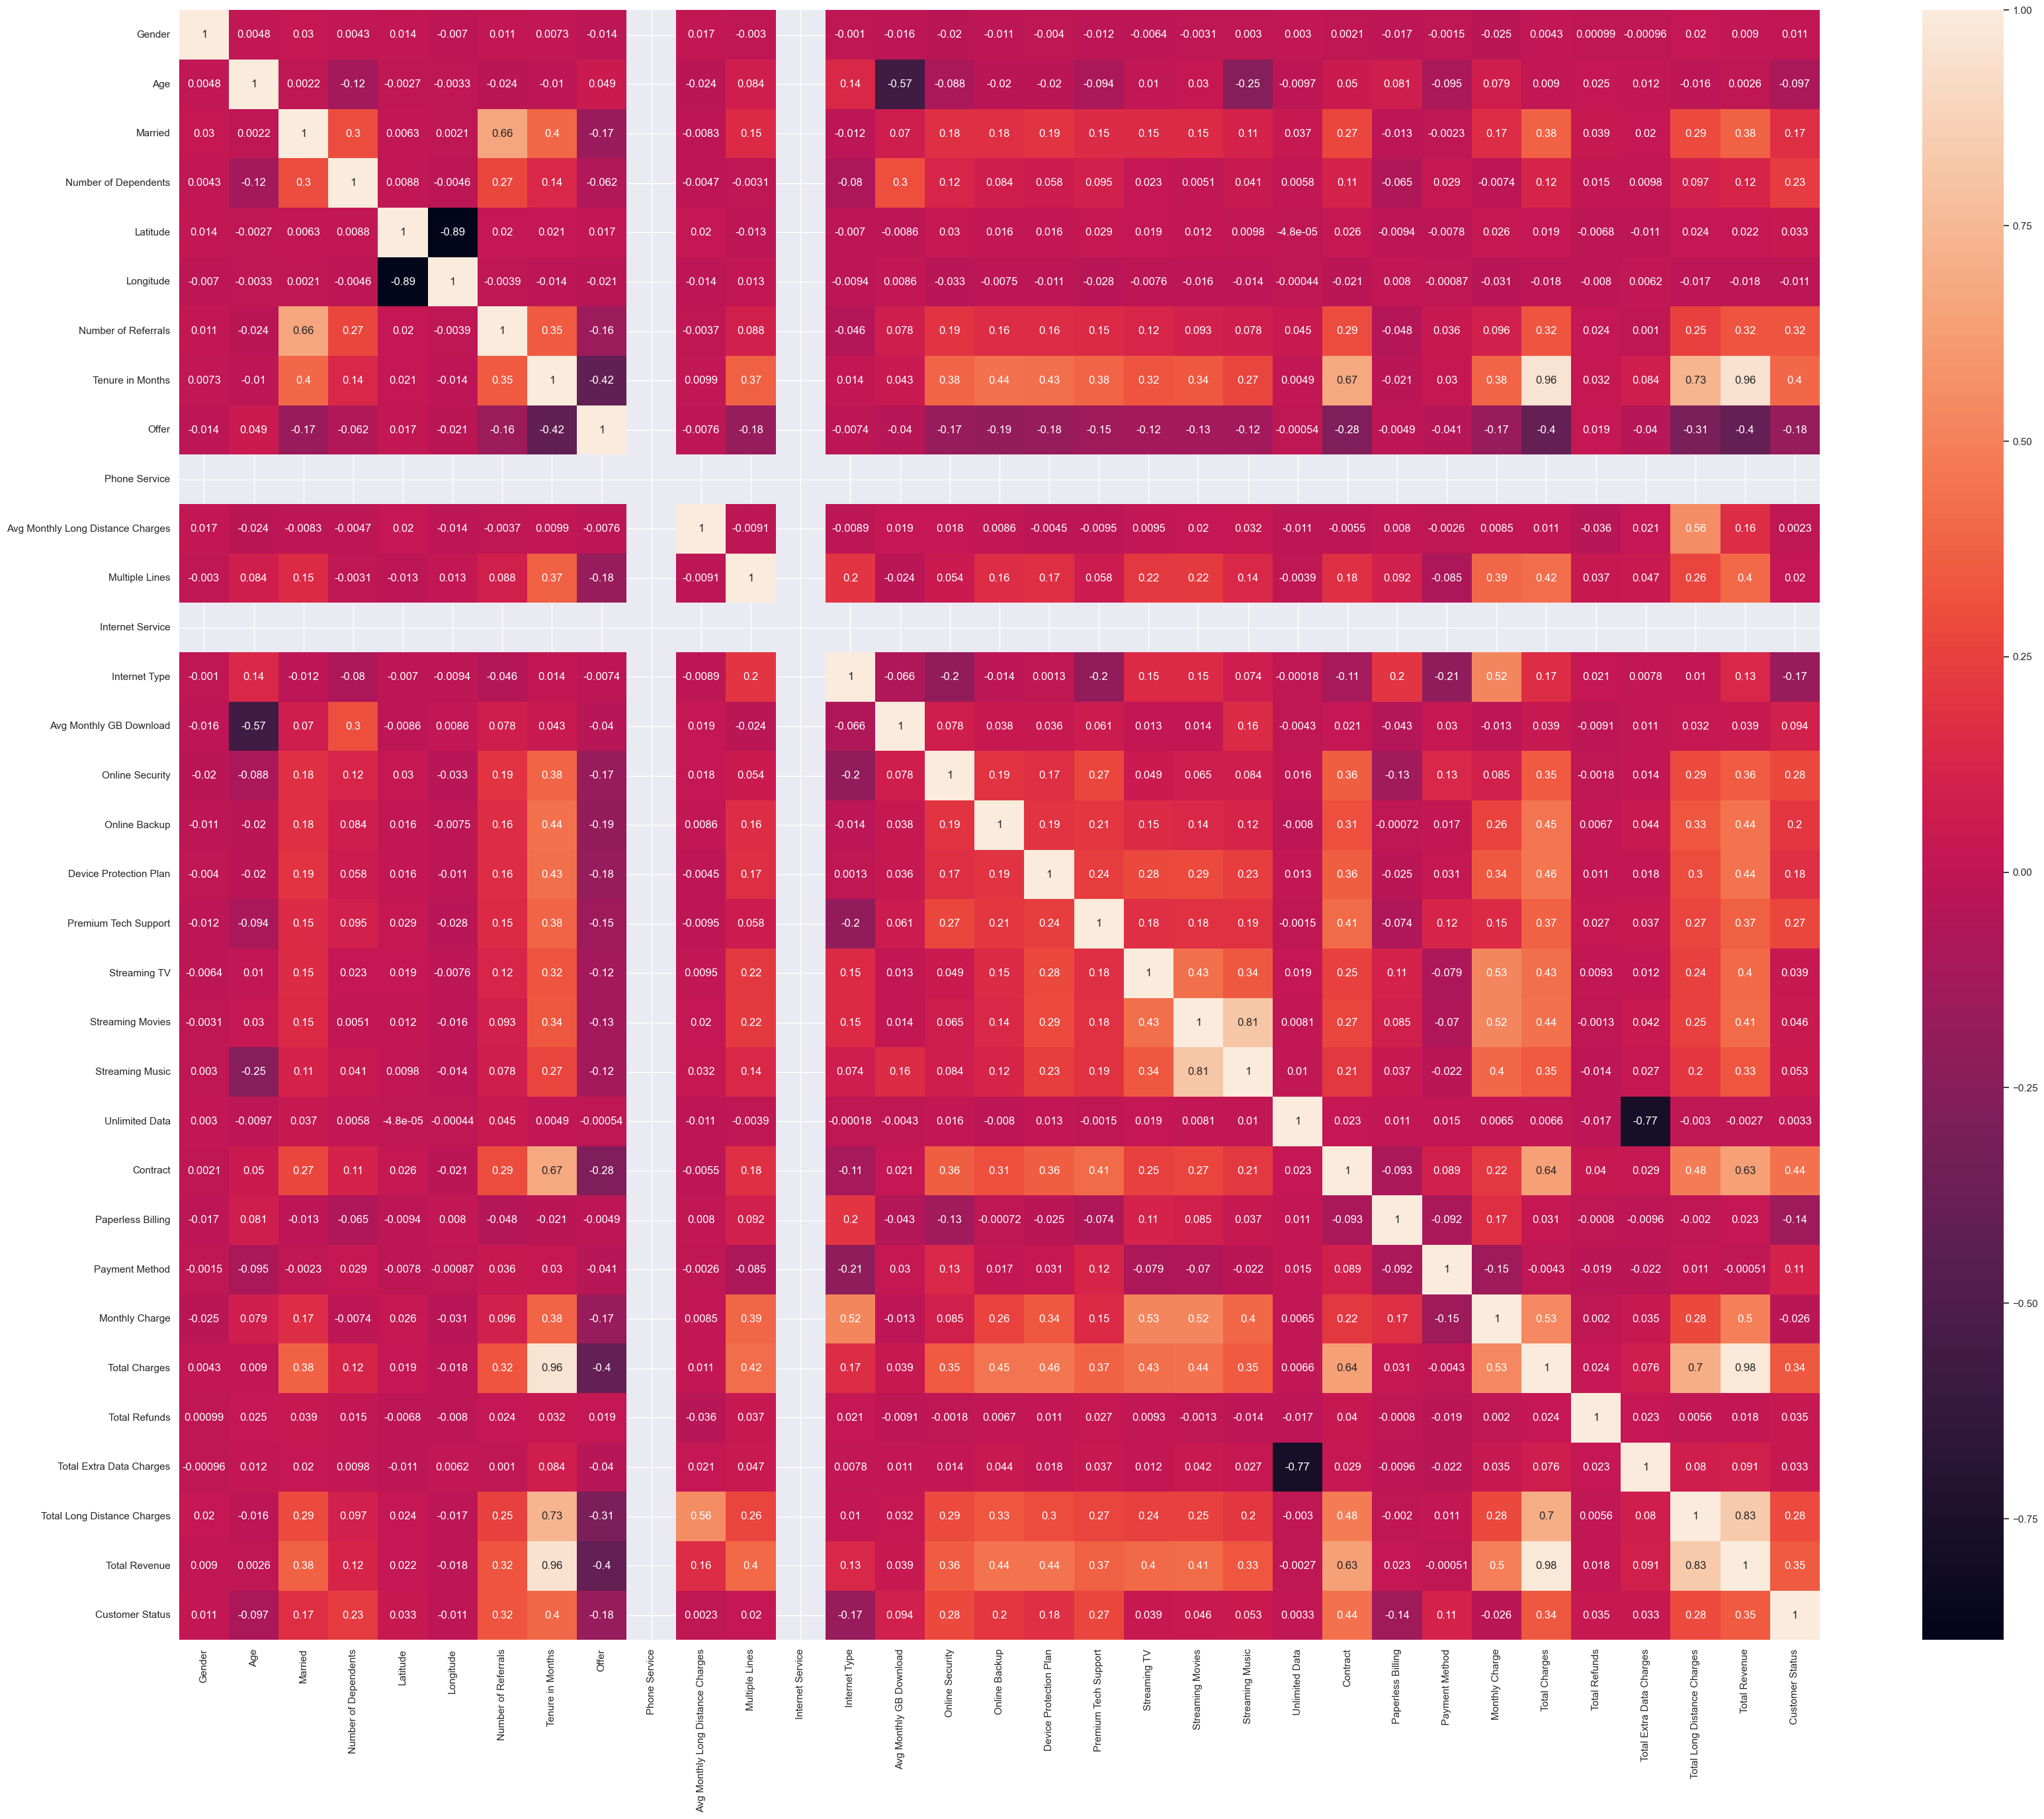

In [37]:
plt.figure(figsize=(40,32))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [38]:
#Remove the Internet Service and Phone Service column because of Zero correlation
df.drop(columns=['Internet Service','Phone Service'], inplace=True)
df.shape

(4835, 31)

In [39]:
df.to_csv("customer_churn_preprocessed_edadata.csv")